In [35]:
# tf.keras.datasets.mnist.load_data(path="mnist.npz")
from keras.datasets import mnist

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [38]:
x_train.shape   # (60000, 28, 28)
y_train.shape   # (60000,)
x_test.shape    # (10000, 28, 28)
y_test.shape    # (10000,)

(10000,)

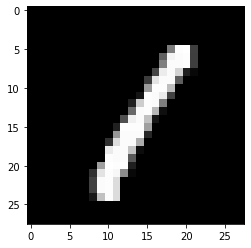

In [39]:
plt.imshow(x_train[3],cmap='gray')

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
y_test[3]

0

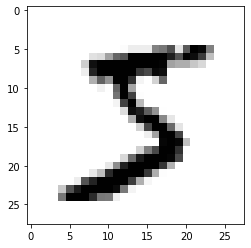

In [42]:
plt.imshow(x_train[0],cmap='gray_r')

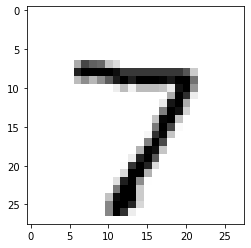

In [43]:
plt.imshow(x_test[0],cmap='gray_r')

One Hot Encoding

In [44]:
from keras.utils.np_utils import to_categorical

In [45]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [46]:
y_cat_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Preprocessing of training set

In [47]:
x_train = x_train/(x_train.max())
x_test = x_test/(x_test.max())

RESHAPE

In [50]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

BUILD MODEL

In [51]:
from keras.models import Sequential

In [52]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [53]:
model = Sequential() 

# CNN LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))

#MAX POOLING
model.add(MaxPool2D(pool_size=(2,2)))

#CONVERTING FROM 2D TO 1D
model.add(Flatten())

#DENSE LAYER
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

#COMPILE
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 25s 416us/step - loss: 0.1458 - accuracy: 0.9561
Epoch 2/2
60000/60000 [==============================] - 23s 383us/step - loss: 0.0498 - accuracy: 0.9855


In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 84us/step


[0.04522434666070622, 0.9865999817848206]

In [58]:
from sklearn.metrics import classification_report

In [59]:
predictions = model.predict_classes(x_test)

In [60]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       1.00      0.96      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

